In [1]:
# import libraries 
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
from matplotlib import colorbar
import seaborn as sns
%matplotlib inline

from wordcloud import WordCloud
from matplotlib.pyplot import figure

import nltk
from nltk import WordNetLemmatizer, pos_tag 
from nltk.corpus import stopwords, wordnet 

from nltk.tokenize import word_tokenize


import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

np.random_state = 42

## Load in Dataset

In [58]:
sd_listings = pd.read_csv('data/sd_listings', index_col= 0)
sd_listings.head(5)

,id,listing_url,latitude,longitude,zipcode,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,nightly_price,price_per_stay,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,host_id,host_url,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,host_total_listings_count,host_has_profile_pic,host_identity_verified,number_of_reviews,number_of_stays,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,33159143,https://www.airbnb.com/rooms/33159143,32.91736,-117.07635,92131.0,"PRIVATE ROOM, SAFE NEIGHBORHOOD IN SCRIPPS RANCH",80% of the house + yourCozy room ... in Scripp...,"Full bed, private bath...",80% of the house + yourCozy room ... in Scripp...,The neighborhood is a typical Southern Califor...,Have alarm system if you choose to use... I wi...,You can park in the drive way or plenty of spa...,"Kitchen, Dining room, Living room, Very Comfor...","I lived in San Diego 40+ years, love to share ...",#NAME?,House,Private room,1,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",Heati...",1100.0,1100.0,1000.0,0.0,1.0,0.0,60.0,90.0,249661563.0,https://www.airbnb.com/users/show/249661563,3/18/19,Retired businessman of 30 years in this commun...,within a few hours,100.0,0.0,Scripps Ranch,1.0,1.0,0.0,0.0,0.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.0,0.0,strict_14_with_grace_period,0.0,0.0
1,17138468,https://www.airbnb.com/rooms/17138468,32.84067,-117.27443,92037.0,NOT AVAILABLE,AVAILABLE ONLY IN WINTER PRIME La Jolla Villag...,NaN,AVAILABLE ONLY IN WINTER PRIME La Jolla Villag...,NaN,NaN,NaN,NaN,NaN,NaN,Apartment,Entire home/apt,1,2.0,2.0,3.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",1400.0,1400.0,NaN,NaN,1.0,0.0,30.0,1125.0,79755951.0,https://www.airbnb.com/users/show/79755951,6/24/16,Quiet and considerate.,NaN,0.0,0.0,La Jolla,1.0,1.0,0.0,2.0,4.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.0,0.0,strict_14_with_grace_period,0.0,0.0
2,21898446,https://www.airbnb.com/rooms/21898446,32.79797,-117.2425,92109.0,Townhome in Pacific Beach,Hi! We are basically renting this master for a...,NaN,Hi! We are basically renting this master for a...,NaN,NaN,NaN,NaN,NaN,NaN,Townhouse,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""P...",1250.0,1250.0,NaN,NaN,1.0,0.0,30.0,30.0,159773487.0,https://www.airbnb.com/users/show/159773487,11/22/17,NaN,NaN,0.0,0.0,Pacific Beach,1.0,1.0,0.0,0.0,0.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.0,0.0,flexible,0.0,0.0
3,25948680,https://www.airbnb.com/rooms/25948680,32.77545,-117.05923,92120.0,Spacious furnished 1 BR with tons of amenaties,"All my stuff will be gone. Dishwasher, washer/...",Lobby provides free coffee. Building doors loc...,"All my stuff will be gone. Dishwasher, washer/...",College area,NaN,Across the street from the green line trolly. ...,Everything except second bedroom in apartment....,NaN,NaN,Apartment,Entire home/apt,1,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Pool,Kitchen,""Free pa...",1150.0,1150.0,NaN,NaN,1.0,0.0,31.0,40.0,185758729.0,https://www.airbnb.com/users/show/185758729,4/22/18,NaN,NaN,0.0,0.0,College Area,1.0,1.0,0.0,0.0,0.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,flexible,0.0,0.0
4,1756516,https://www.airbnb.com/rooms/1756516,32.84619,-117.27558,92037.0,A Spacious luxury retreat,"NIcely furnished. Great location, 2 blocks to ...",NaN,"NIcely furnished. Great location, 2 blocks to ...",coastal town great travel destination.,NaN,Bus line near by.,NaN,Call/text business hours.,No pets. Clean and healthy.,Condominium,Private room,1,1.0,1.0,1.0,Re

#### Split dataframe into text columns only

In [3]:
sd_listings.columns

Index(['id', 'listing_url', 'latitude', 'longitude', 'zipcode', 'name',
       'summary', 'space', 'description', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'nightly_price', 'price_per_stay',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'host_id', 'host_url', 'host_since',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'neighbourhood_cleansed',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'number_of_reviews', 'number_of_stays',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license',

In [4]:
# get text columns
sd_text = sd_listings[['id', 'listing_url', 'name','summary', 'space', 'description', 
                       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 
                       'house_rules', 'amenities', 'host_about']]

sd_text.head(3)

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,amenities,host_about
0,33159143,https://www.airbnb.com/rooms/33159143,"PRIVATE ROOM, SAFE NEIGHBORHOOD IN SCRIPPS RANCH",80% of the house + yourCozy room ... in Scripp...,"Full bed, private bath...",80% of the house + yourCozy room ... in Scripp...,The neighborhood is a typical Southern Califor...,Have alarm system if you choose to use... I wi...,You can park in the drive way or plenty of spa...,"Kitchen, Dining room, Living room, Very Comfor...","I lived in San Diego 40+ years, love to share ...",#NAME?,"{Wifi,Kitchen,""Free parking on premises"",Heati...",Retired businessman of 30 years in this commun...
1,17138468,https://www.airbnb.com/rooms/17138468,NOT AVAILABLE,AVAILABLE ONLY IN WINTER PRIME La Jolla Villag...,NaN,AVAILABLE ONLY IN WINTER PRIME La Jolla Villag...,NaN,NaN,NaN,NaN,NaN,NaN,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",Quiet and considerate.
2,21898446,https://www.airbnb.com/rooms/21898446,Townhome in Pacific Beach,Hi! We are basically renting this master for a...,NaN,Hi! We are basically renting this master for a...,NaN,NaN,NaN,NaN,NaN,NaN,"{TV,Wifi,Kitchen,""Free parking on premises"",""P...",NaN


In [5]:
sd_text.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13052 entries, 0 to 13050
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     13052 non-null  object
 1   listing_url            13052 non-null  object
 2   name                   13052 non-null  object
 3   summary                12636 non-null  object
 4   space                  10081 non-null  object
 5   description            12837 non-null  object
 6   neighborhood_overview  9139 non-null   object
 7   notes                  7104 non-null   object
 8   transit                8262 non-null   object
 9   access                 8225 non-null   object
 10  interaction            8667 non-null   object
 11  house_rules            9588 non-null   object
 12  amenities              13051 non-null  object
 13  host_about             8990 non-null   object
dtypes: object(14)
memory usage: 1.5+ MB


## Normalizing and Tokenizing

In [6]:
# import stop words
stop_words = stopwords.words('english')

### Helper function to tokenize columns

In [7]:
# takes in untokenized document and returns fully normalized token list
def process_doc(doc):

    #initialize lemmatizer
    wnl = WordNetLemmatizer()

    # helper function to change nltk's part of speech tagging to a wordnet format.
    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:         
            return None
        
    # remove stop words and punctuations, then lower case
    doc_norm = [tok.lower() for tok in word_tokenize(doc) if ((tok.isalpha()) & (tok not in stop_words)) ]

    #  POS detection on the result will be important in telling Wordnet's lemmatizer how to lemmatize
    
    # creates list of tuples with tokens and POS tags in wordnet format
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(doc_norm))) 
    doc_norm = [wnl.lemmatize(token, pos) for token, pos in wordnet_tagged if pos is not None]
    
    return doc_norm

In [8]:
sd_text.head(5)

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,amenities,host_about
0,33159143,https://www.airbnb.com/rooms/33159143,"PRIVATE ROOM, SAFE NEIGHBORHOOD IN SCRIPPS RANCH",80% of the house + yourCozy room ... in Scripp...,"Full bed, private bath...",80% of the house + yourCozy room ... in Scripp...,The neighborhood is a typical Southern Califor...,Have alarm system if you choose to use... I wi...,You can park in the drive way or plenty of spa...,"Kitchen, Dining room, Living room, Very Comfor...","I lived in San Diego 40+ years, love to share ...",#NAME?,"{Wifi,Kitchen,""Free parking on premises"",Heati...",Retired businessman of 30 years in this commun...
1,17138468,https://www.airbnb.com/rooms/17138468,NOT AVAILABLE,AVAILABLE ONLY IN WINTER PRIME La Jolla Villag...,NaN,AVAILABLE ONLY IN WINTER PRIME La Jolla Villag...,NaN,NaN,NaN,NaN,NaN,NaN,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",Quiet and considerate.
2,21898446,https://www.airbnb.com/rooms/21898446,Townhome in Pacific Beach,Hi! We are basically renting this master for a...,NaN,Hi! We are basically renting this master for a...,NaN,NaN,NaN,NaN,NaN,NaN,"{TV,Wifi,Kitchen,""Free parking on premises"",""P...",NaN
3,25948680,https://www.airbnb.com/rooms/25948680,Spacious furnished 1 BR with tons of amenaties,"All my stuff will be gone. Dishwasher, washer/...",Lobby provides free coffee. Building doors loc...,"All my stuff will be gone. Dishwasher, washer/...",College area,NaN,Across the street from the green line trolly. ...,Everything except second bedroom in apartment....,NaN,NaN,"{Wifi,""Air conditioning"",Pool,Kitchen,""Free pa...",NaN
4,1756516,https://www.airbnb.com/rooms/1756516,A Spacious luxury retreat,"NIcely furnished. Great location, 2 blocks to ...",NaN,"NIcely furnished. Great location, 2 blocks to ...",coastal town great travel destination.,NaN,Bus line near by.,NaN,Call/text business hours.,No pets. Clean and healthy.,"{TV,Wifi,Kitchen,""Free parking on premises"",El...","Life is too short, enjoy it.....\r\n"


### Fill in missing entries

In [9]:
# fill in NaNs with empty text fields
sd_text = sd_text.fillna(' ')
sd_text.head(3)

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,amenities,host_about
0,33159143,https://www.airbnb.com/rooms/33159143,"PRIVATE ROOM, SAFE NEIGHBORHOOD IN SCRIPPS RANCH",80% of the house + yourCozy room ... in Scripp...,"Full bed, private bath...",80% of the house + yourCozy room ... in Scripp...,The neighborhood is a typical Southern Califor...,Have alarm system if you choose to use... I wi...,You can park in the drive way or plenty of spa...,"Kitchen, Dining room, Living room, Very Comfor...","I lived in San Diego 40+ years, love to share ...",#NAME?,"{Wifi,Kitchen,""Free parking on premises"",Heati...",Retired businessman of 30 years in this commun...
1,17138468,https://www.airbnb.com/rooms/17138468,NOT AVAILABLE,AVAILABLE ONLY IN WINTER PRIME La Jolla Villag...,,AVAILABLE ONLY IN WINTER PRIME La Jolla Villag...,,,,,,,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",Quiet and considerate.
2,21898446,https://www.airbnb.com/rooms/21898446,Townhome in Pacific Beach,Hi! We are basically renting this master for a...,,Hi! We are basically renting this master for a...,,,,,,,"{TV,Wifi,Kitchen,""Free parking on premises"",""P...",


In [10]:
sd_text.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13052 entries, 0 to 13050
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     13052 non-null  object
 1   listing_url            13052 non-null  object
 2   name                   13052 non-null  object
 3   summary                13052 non-null  object
 4   space                  13052 non-null  object
 5   description            13052 non-null  object
 6   neighborhood_overview  13052 non-null  object
 7   notes                  13052 non-null  object
 8   transit                13052 non-null  object
 9   access                 13052 non-null  object
 10  interaction            13052 non-null  object
 11  house_rules            13052 non-null  object
 12  amenities              13052 non-null  object
 13  host_about             13052 non-null  object
dtypes: object(14)
memory usage: 1.5+ MB


### Apply tokenization to entire dataframe

In [11]:
def tokenize_df(df):
    """
    Helper function tokenizes each column in the sd_text dataframe.
    Uses the process_doc helper function to tokenize and normalize each column into string values
    """
    # get list of column names 
    col_names = list(sd_text.columns)
    # just get the relevant text columns
    col_names = col_names[2:]
    
    # create an empty dataframe
    tokenized_df = pd.DataFrame()

    # tokenize each column 
    for col in col_names:
        
        # use helper function to get a series of tokenized text for each column, and flatten the lists into tokens
        tokenized_series = df[col].apply(process_doc).apply(" ".join)
        
        # convert each col into a df
        tokenized_col = tokenized_series.to_frame().transpose()
        
        # add to overall df
        tokenized_df = tokenized_df.append(tokenized_col)
    
    # pivot the rows and columns 
    tokenized_df = tokenized_df.transpose()
    
    # merge the id, listing_url to the tokenized columns
    tokenized_df = df.iloc[:,[0,1]].join(tokenized_df)

    return tokenized_df

**WARNING**

Below helper function takes about 5 minutes to process. 

In [12]:
# # tokenize sd_text and put tokenized results into a new df called tokenized_text
# tokenized_text = tokenize_df(sd_text)
# tokenized_text.head()

In [14]:
# # save as csv
# path = "data/"

# tokenized_text.to_csv(path + 'tokenized_text')

In [50]:
tokenized_text = pd.read_csv('data/tokenized_text', index_col= 0)
tokenized_text = tokenized_text.fillna(' ')
tokenized_text.head(3)

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,amenities,host_about
0,33159143,https://www.airbnb.com/rooms/33159143,private room safe neighborhood scripps ranch,house yourcozy room scripps ranch decor safe f...,full bed private bath,house yourcozy room scripps ranch decor safe f...,neighborhood typical southern california spani...,have alarm system choose use i supply butane b...,park drive way plenty space next house,kitchen din room living room very comfortable ...,i live san diego year love share neat place ci...,name,wifi kitchen free parking premise heat dryer s...,retire businessman year community be se asia i...
1,17138468,https://www.airbnb.com/rooms/17138468,not available,available only winter prime la jolla village l...,,available only winter prime la jolla village l...,,,,,,,tv wifi air condition kitchen free parking pre...,quiet considerate
2,21898446,https://www.airbnb.com/rooms/21898446,townhome pacific beach,hi basically rent master month move date room ...,,hi basically rent master month move date room ...,,,,,,,tv wifi kitchen free parking premise pet allow...,


## Data Visualization

Now that the text for each listing category has been tokenized, let's explore the distribution of words using a simple wordcloud for some of the features. 

### Airbnb Listing Descriptions
#### Name

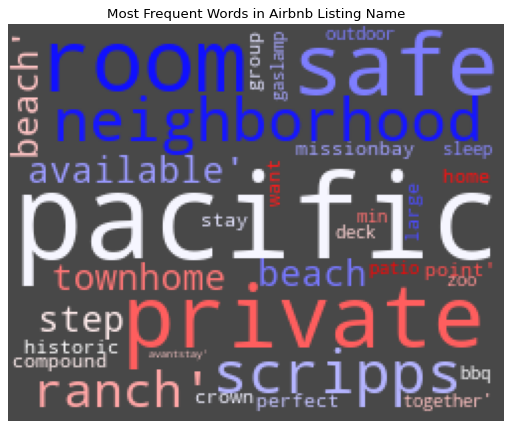

In [51]:
# creates an array of all values in the name column
name = tokenized_text['name'].values

# create wordcloud
name_wordcloud = WordCloud(background_color = '#484848',
                           colormap = 'bwr',
                           max_font_size = 100,
                           width = 250,
                           height = 200,
                           random_state = 10).generate(str(name))

# show fig
figure(figsize=(8, 8), dpi=80)
plt.imshow(name_wordcloud)
plt.title('Most Frequent Words in Airbnb Listing Name')
plt.axis('off')
plt.show()

#### Summary

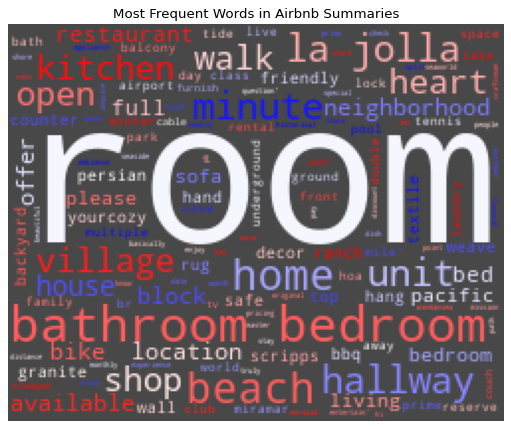

In [52]:
# creates an array of all values in the name column
summary = tokenized_text['summary'].values

# create wordcloud
summary_wordcloud = WordCloud(background_color = '#484848',
                           colormap = 'bwr',
                           max_font_size = 100,
                           width = 250,
                           height = 200,
                           random_state = 10).generate(str(summary))

# show fig
figure(figsize=(8, 8), dpi = 80)
plt.imshow(summary_wordcloud)
plt.title('Most Frequent Words in Airbnb Summaries')
plt.axis('off')
plt.show()

#### Space

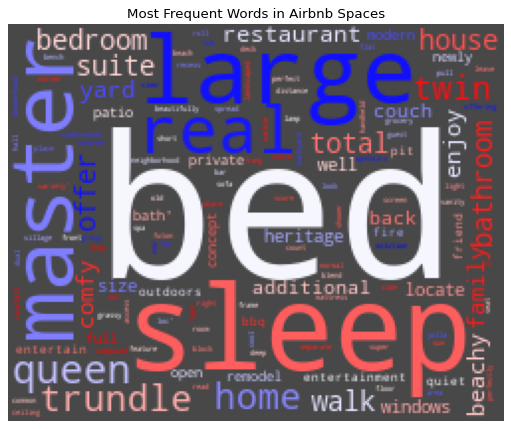

In [53]:
# creates an array of all values in the name column
space = tokenized_text['space'].values

# create wordcloud
space_wordcloud = WordCloud(background_color = '#484848',
                           colormap = 'bwr',
                           max_font_size = 100,
                           width = 250,
                           height = 200,
                           random_state = 10).generate(str(space))

# show fig
figure(figsize=(8, 8), dpi = 80)
plt.imshow(space_wordcloud)
plt.title('Most Frequent Words in Airbnb Spaces')
plt.axis('off')
plt.show()

#### Description

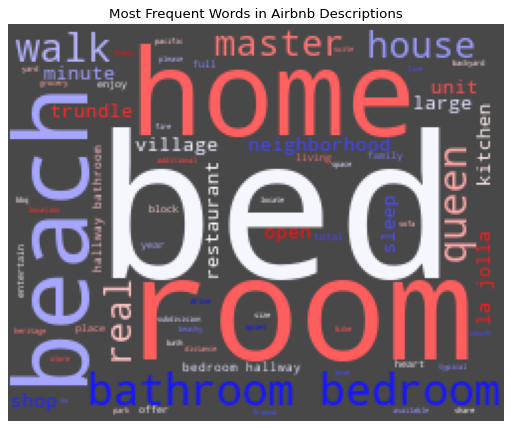

In [54]:
# creates an array of all values in the name column
description = tokenized_text['description'].values

# create wordcloud
description_wordcloud = WordCloud(background_color = '#484848',
                           colormap = 'bwr',
                           max_font_size = 100,
                           width = 250,
                           height = 200,
                           random_state = 10).generate(str(description))

# show fig
figure(figsize=(8, 8), dpi = 80)
plt.imshow(description_wordcloud)
plt.title('Most Frequent Words in Airbnb Descriptions')
plt.axis('off')
plt.show()

#### Neighborhood Overview

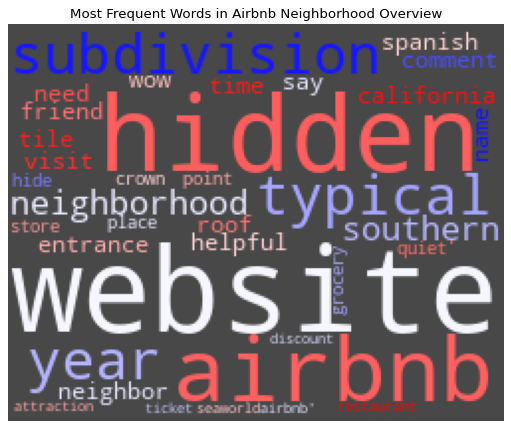

In [55]:
# creates an array of all values in the name column
neighborhood = tokenized_text['neighborhood_overview'].values

# create wordcloud
neighborhood_wordcloud = WordCloud(background_color = '#484848',
                           colormap = 'bwr',
                           max_font_size = 100,
                           width = 250,
                           height = 200,
                           random_state = 10).generate(str(neighborhood))

# show fig
figure(figsize=(8, 8), dpi = 80)
plt.imshow(neighborhood_wordcloud)
plt.title('Most Frequent Words in Airbnb Neighborhood Overview')
plt.axis('off')
plt.show()

#### Transit

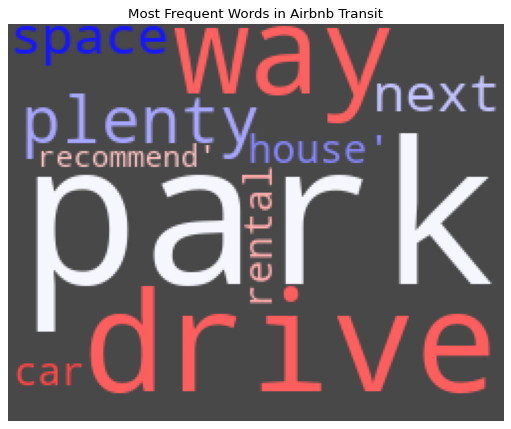

In [56]:
# creates an array of all values in the name column
transit = tokenized_text['transit'].values

# create wordcloud
transit_wordcloud = WordCloud(background_color = '#484848',
                           colormap = 'bwr',
                           max_font_size = 100,
                           width = 250,
                           height = 200,
                           random_state = 10).generate(str(transit))

# show fig
figure(figsize=(8, 8), dpi = 80)
plt.imshow(transit_wordcloud)
plt.title('Most Frequent Words in Airbnb Transit')
plt.axis('off')
plt.show()

#### Interaction

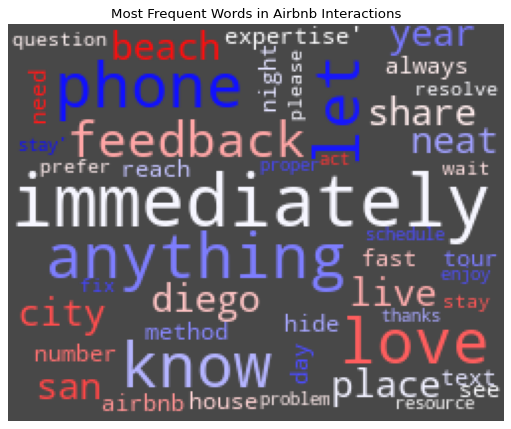

In [59]:
# creates an array of all values in the name column
interaction = tokenized_text['interaction'].values

# create wordcloud
interaction_wordcloud = WordCloud(background_color = '#484848',
                           colormap = 'bwr',
                           max_font_size = 100,
                           width = 250,
                           height = 200,
                           random_state = 10).generate(str(interaction))

# show fig
figure(figsize=(8, 8), dpi = 80)
plt.imshow(interaction_wordcloud)
plt.title('Most Frequent Words in Airbnb Interactions')
plt.axis('off')
plt.show()

#### Amenities

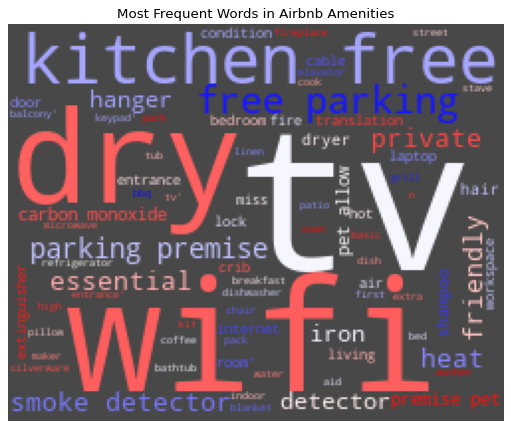

In [60]:
# creates an array of all values in the name column
amenities = tokenized_text['amenities'].values

# create wordcloud
amenities_wordcloud = WordCloud(background_color = '#484848',
                           colormap = 'bwr',
                           max_font_size = 100,
                           width = 250,
                           height = 200,
                           random_state = 10).generate(str(amenities))

# show fig
figure(figsize=(8, 8), dpi = 80)
plt.imshow(amenities_wordcloud)
plt.title('Most Frequent Words in Airbnb Amenities')
plt.axis('off')
plt.show()

#### Host About

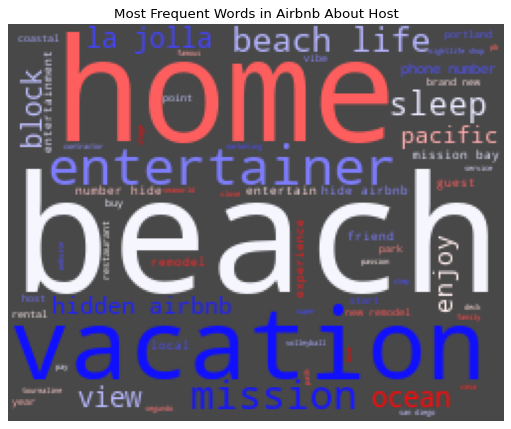

In [61]:
# creates an array of all values in the name column
host = tokenized_text['host_about'].values

# create wordcloud
host_wordcloud = WordCloud(background_color = '#484848',
                           colormap = 'bwr',
                           max_font_size = 100,
                           width = 250,
                           height = 200,
                           random_state = 10).generate(str(host))

# show fig
figure(figsize=(8, 8), dpi = 80)
plt.imshow(host_wordcloud)
plt.title('Most Frequent Words in Airbnb About Host')
plt.axis('off')
plt.show()

### Findings

- Most listings tend to be described as scenic and picturesque by the beach (or some variation of paradise). 

- A lot of listings are ironically "hidden". 

- Must have wifi, tv, parking, and large beds!

- The hosts must have a lot of spare time to rent out Airbnbs as their side jobs are also involved in entertainment. 